In [1]:
import pandas as pd
from tqdm import tqdm
import os
import dataset
import seaborn as sns

# Load data and rearrange in a convenient format

Check if data has already been processed and saved. Define parameter in the section below as needed.

In [2]:
DATA_PATH = 'data/EPL_processed_results.csv'  # Path to CSV file containing aggregated results from all matches
RAW_DATA_PATH = 'data/EPL_results_all.csv'  # Path to CSV file containing raw match results (without aggregating)
STANDINGS_PATH = 'data/EPL_Standings.csv'  # Path to CSV file containing historical standings

In [3]:
if os.path.isfile(DATA_PATH):
    data = pd.read_csv(DATA_PATH, index_col=0)

else:
    all_matches = pd.read_csv(RAW_DATA_PATH)
    all_matches['Date'] = pd.to_datetime(all_matches['Date'], dayfirst=True)
    standings = pd.read_csv(STANDINGS_PATH)

    data = pd.DataFrame(columns=['Season', 'Date', 'HomeTeam', 'AwayTeam', 'FTR', 'HomeGoals', 'AwayGoals', 
                                 'StandingDiff', 'HomeWins', 'AwayWins', 'HomeDraws', 'AwayDraws', 'AvgHomeGoals', 
                                 'AvgAwayGoals', 'AvgHomeShots', 'AvgAwayShots', 'AvgHomeShotsOnTarget', 
                                 'AvgAwayShotsOnTarget', 'AvgHomeCorners', 'AvgAwayCorners', 'AvgHomeGoalsConceded', 
                                 'AvgAwayGoalsConceded', 'AvgHomeShotsConceded', 'AvgAwayShotsConceded'])
    skipped = 0

    for ind, row in tqdm(all_matches.iterrows(), total=all_matches.shape[0]):
        match_stats = dataset.get_match_stats(row, standings, 5)
        if match_stats is not None:
            data = data.append([match_stats], ignore_index=True)
        else:
            skipped += 1

    print(
        '%d matches skipped due to insufficient data. %d valid matches loaded' % (skipped, len(data))
    )

In [4]:
data.head()

Season        Date     HomeTeam    AwayTeam FTR  HomeGoals  AwayGoals  \
0  2011-12  2011-11-05      Arsenal   West Brom   H          3          0   
1  2011-12  2011-11-05  Aston Villa     Norwich   H          3          2   
2  2011-12  2011-11-05    Blackburn     Chelsea   A          0          1   
3  2011-12  2011-11-05    Liverpool     Swansea   D          0          0   
4  2011-12  2011-11-05   Man United  Sunderland   H          1          0   

   StandingDiff  HomeWins  AwayWins  ...  AvgHomeShots  AvgAwayShots  \
0            -7      80.0      40.0  ...          16.0           9.6   
1            -9      40.0      20.0  ...          10.6          11.6   
2            13      20.0      40.0  ...          12.8          18.2   
3           -12      40.0       0.0  ...          16.2          10.2   
4            -9      80.0      20.0  ...          18.6          13.0   

   AvgHomeShotsOnTarget  AvgAwayShotsOnTarget  AvgHomeCorners  AvgAwayCorners  \
0                   8.8                   5.8             8.2             5.4   
1                   4.6                   6.0             5.6             4.8   
2                   6.2                   9.8             6.2             6.8   
3                   8.4                   6.4             8.6             6.4   
4                  12.0                   6.8             7.0             4.8   

   AvgHomeGoalsConceded  AvgAwayGoalsConceded  AvgHomeShotsConceded  \
0                   0.8                   1.6                   7.8   
1                   0.8                   1.6                  11.2   
2                   2.4                   1.2                  14.8   
3                   1.0                   2.8                  11.0   
4                   1.8                   1.0                  18.2   

   AvgAwayShotsConceded  
0                  12.2  
1                  16.6  
2                  10.8  
3                  18.8  
4                  14.4  

[5 rows x 24 columns]

# Some visualizations

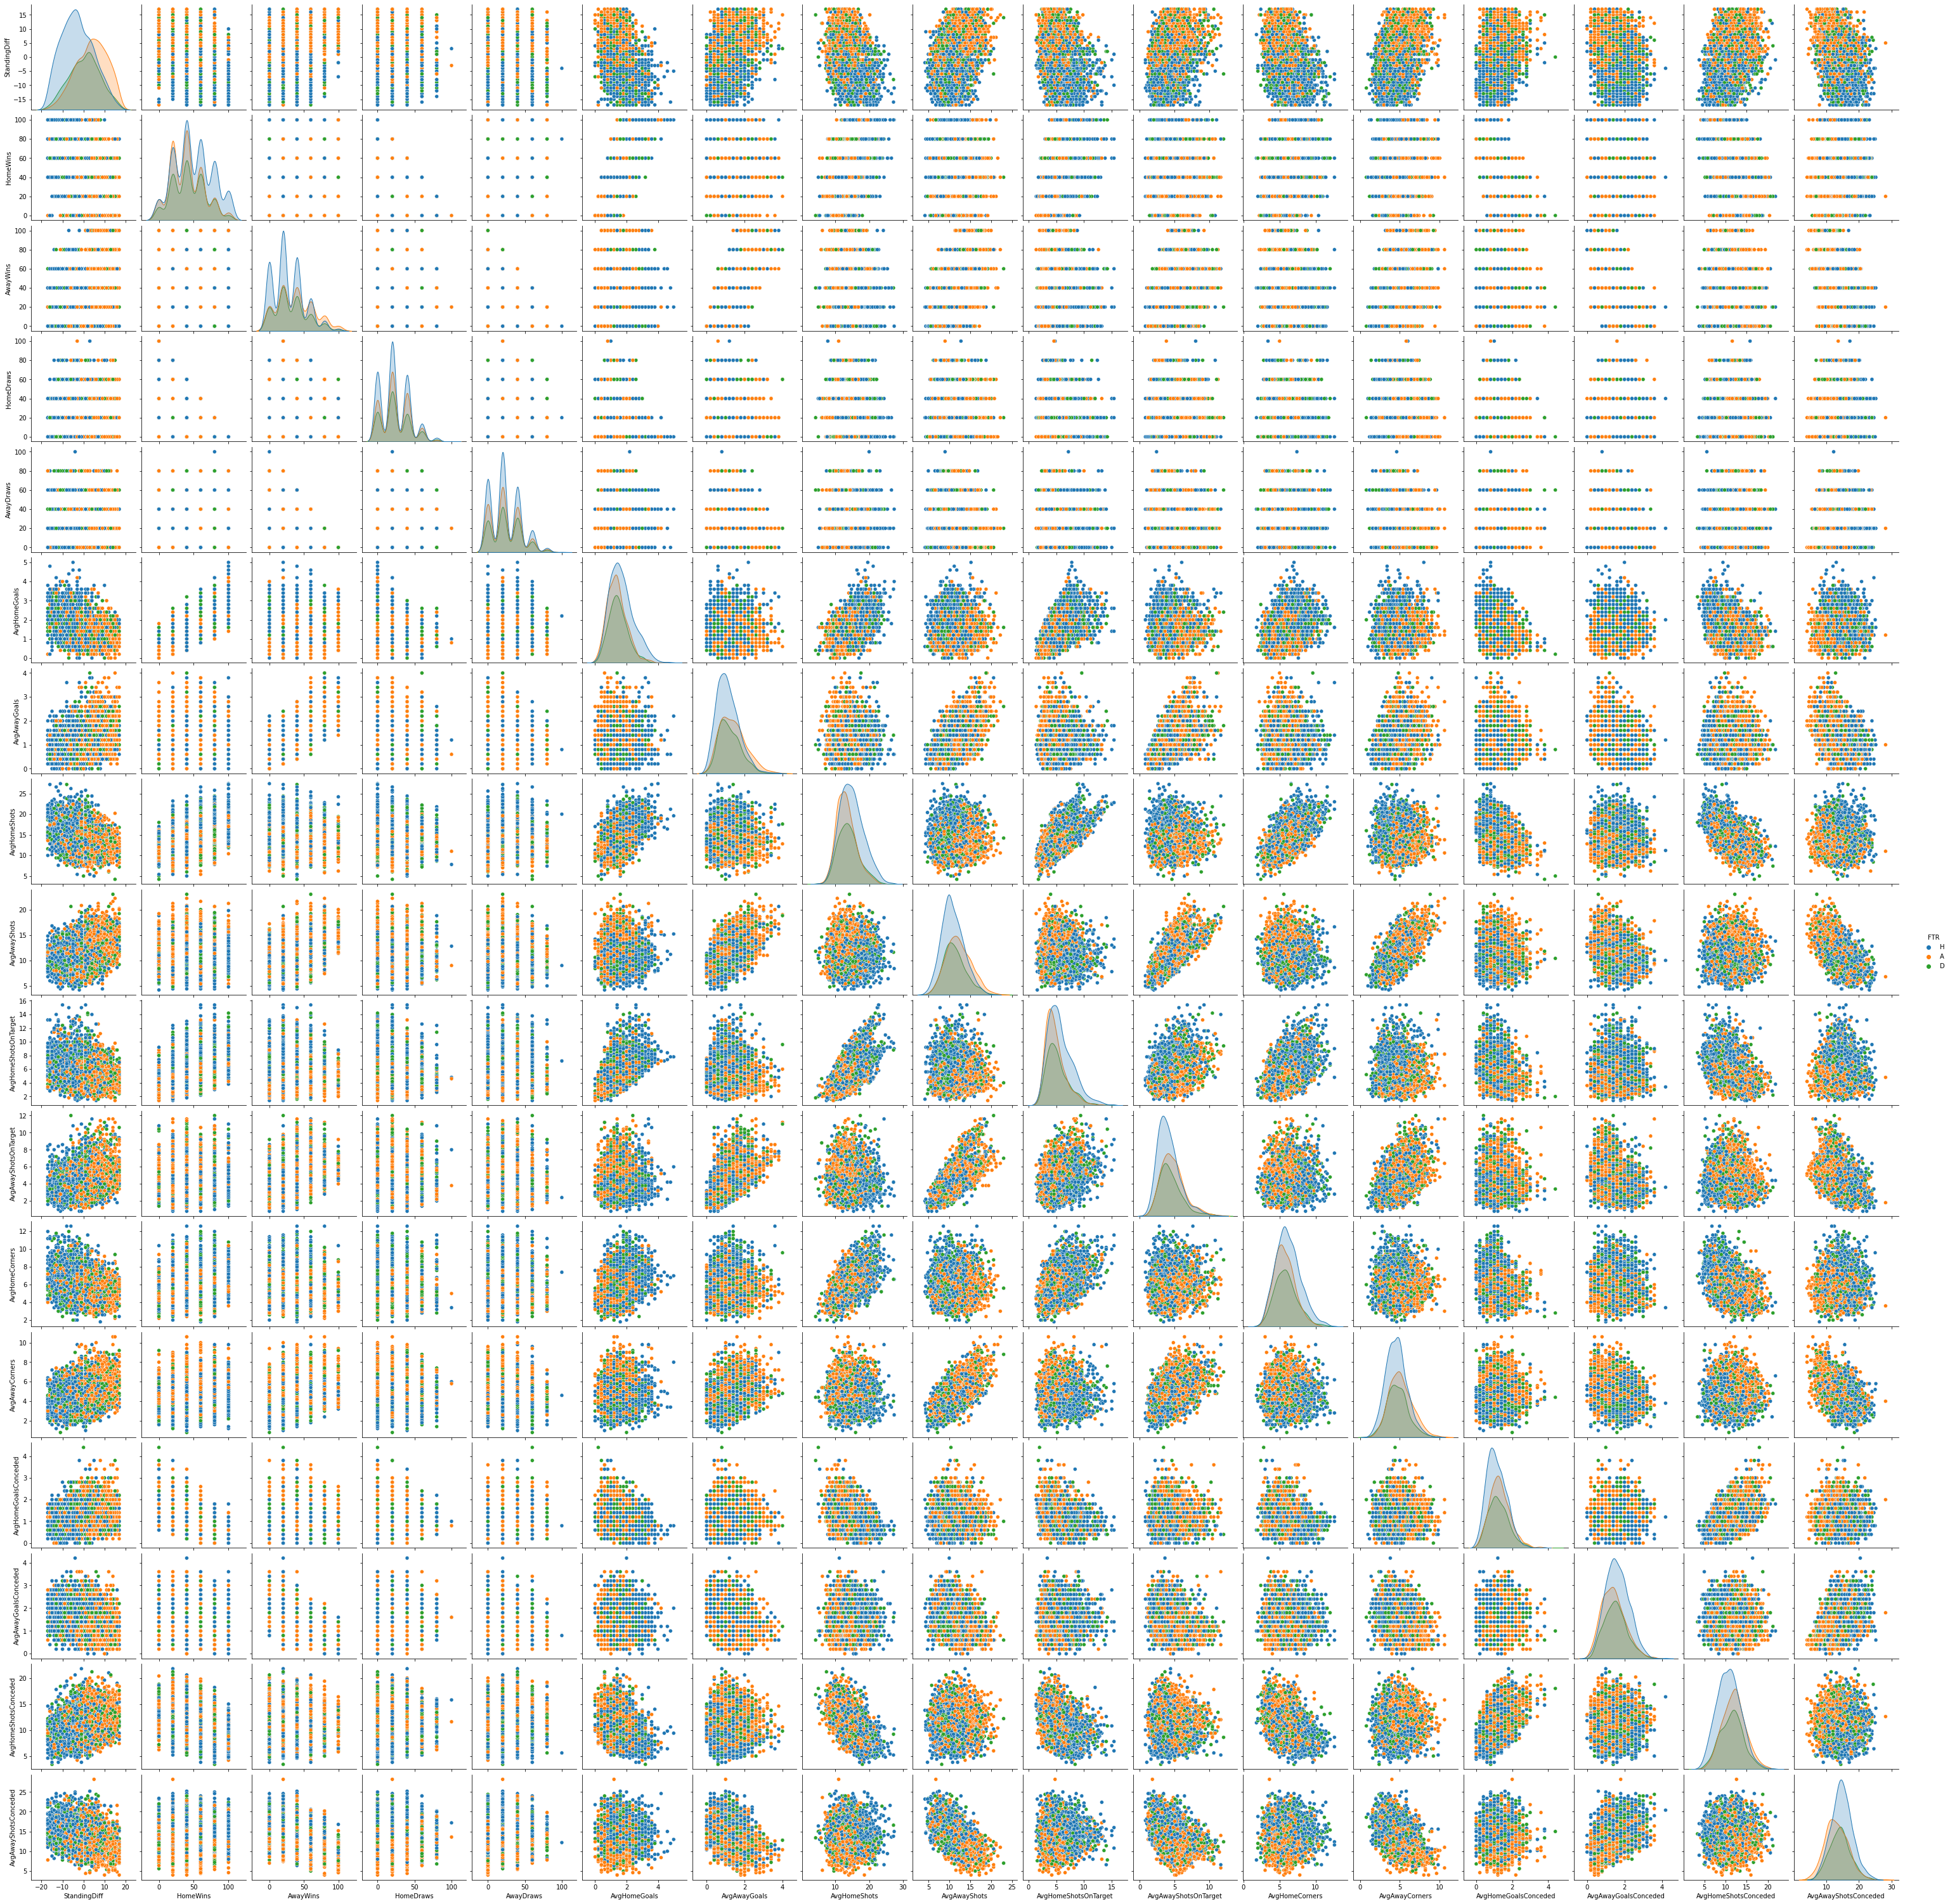

In [5]:
sns.pairplot(data[['FTR', 'StandingDiff', 'HomeWins', 'AwayWins', 'HomeDraws',
       'AwayDraws', 'AvgHomeGoals', 'AvgAwayGoals', 'AvgHomeShots',
       'AvgAwayShots', 'AvgHomeShotsOnTarget', 'AvgAwayShotsOnTarget',
       'AvgHomeCorners', 'AvgAwayCorners', 'AvgHomeGoalsConceded',
       'AvgAwayGoalsConceded', 'AvgHomeShotsConceded', 'AvgAwayShotsConceded']], hue='FTR', diag_kind='kde')

Distribution of results

<AxesSubplot:>

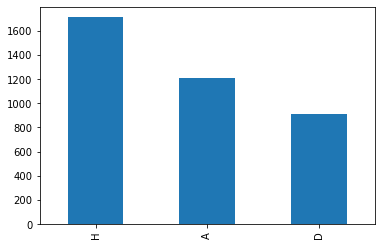

In [6]:
data['FTR'].value_counts().plot.bar()